In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt 
from torchvision import datasets, transforms
%matplotlib inline

In [49]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

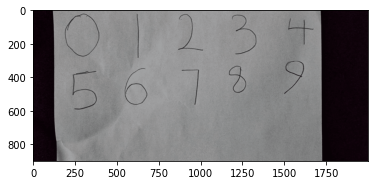

In [4]:
number = cv2.imread('images\\numbers.png')
type(number)
plt.imshow(number)

In [5]:
zero = number[0:300,180:400]
one = number[0:300, 500:720]
two = number[0:300, 780:1100]
three = number[0:300, 1150:1350]
four = number[0:220,1450:1690]
five = number[350:600,180:400]
six = number[320:600,500:720]
seven = number[320:600,800:1100]
eight = number[320:520,1150:1320]
nine = number[290:550, 1450:1630]

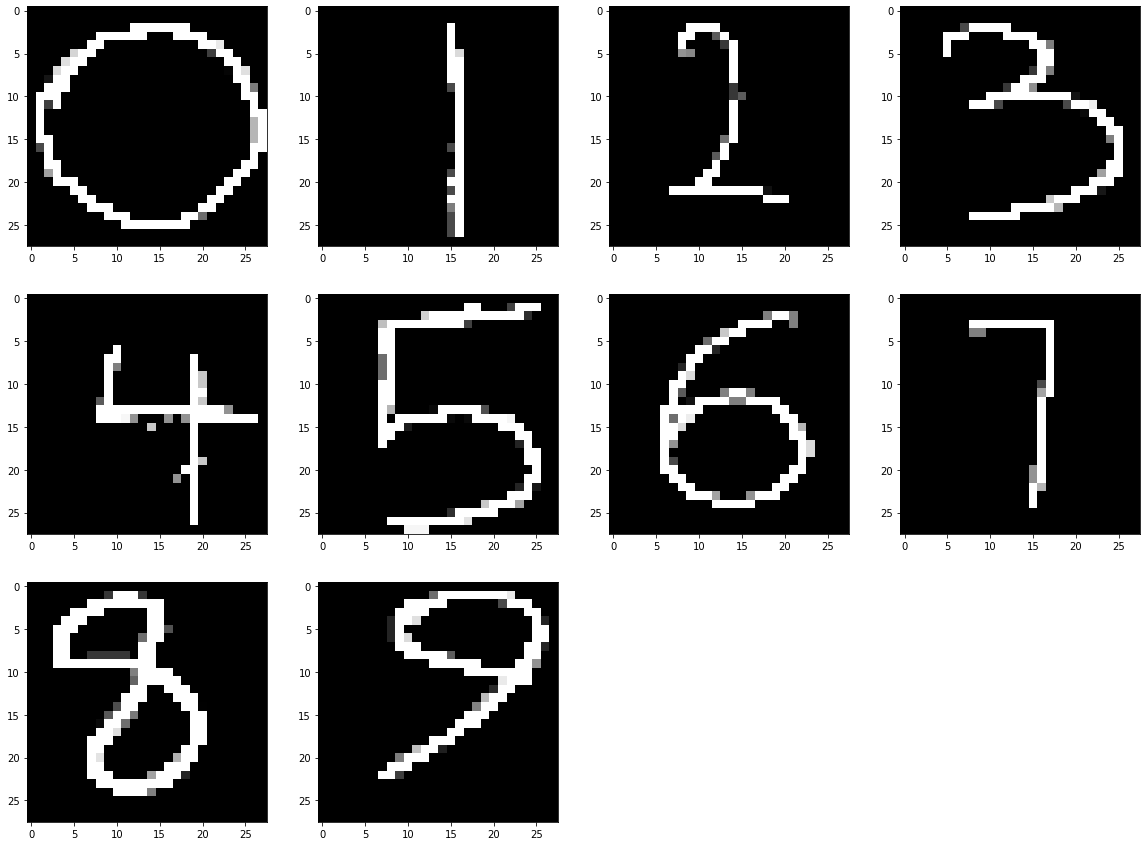

In [166]:
from ctypes import resize
from math import ceil
numbers = [zero,one,two,three,four,five,six,seven,eight,nine]
plt.subplots(figsize=(20,15))
cols = 4
rows = ceil(len(numbers)/cols)
kernel = np.ones((3, 3), np.uint8)

for index,num in enumerate(numbers):
    plt.subplot(rows,cols,index+1) 
    gray_num = cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
    retval, dst2 = cv2.threshold(gray_num, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    dil = cv2.dilate(dst2,kernel,iterations=3)
    dil= cv2.resize(dil,(28,28))
    figures = cv2.imwrite(rf'images\\figures\\{index}.png',dil)
    
    plt.imshow(dil, cmap='gray')
    
    


In [68]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])
from model import model

In [122]:
state_dict = torch.load('model_ 0.98.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [161]:
#TESTING
trsf_digits = transform(dil)
trsf_digits.shape

torch.Size([1, 28, 28])

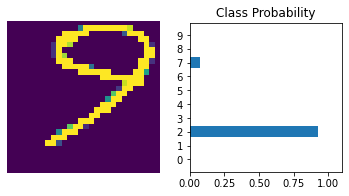

In [162]:
trsf_digits.resize_(trsf_digits.shape[0], 1, 784)
ps = model.forward(trsf_digits[0,:])
view_classify(trsf_digits[0].view(1, 28, 28), ps)